# 🎓 Machine Learning Project

## Title Page

**Project Participants:**
- Айжулдыз

**Project Description:**
This project demonstrates the implementation of machine learning algorithms from scratch, including linear and logistic regression with gradient descent, as well as comparative analysis of various classification models.

**Data Source:**
Instax sales transaction dataset (instax_sales_transaction_data.csv)

---

## Project Contents

1. **Linear Regression** (implementation from scratch)
   - Gradient descent (batch/mini-batch)
   - Loss visualization, learning rate impact
   - Confidence intervals

2. **Logistic Regression** (implementation from scratch)
   - Sigmoid and log-loss function
   - Gradient descent with L2 regularization

3. **Classification** (two approaches)
   - Logistic Regression (custom implementation)
   - Decision Tree / Random Forest (sklearn)

4. **Experiments and Metrics**
   - Accuracy, Precision, Recall, F1-score
   - Confusion Matrix, ROC AUC
   - Model comparison

5. **Interactive Interface**
   - Widgets for data loading
   - Training parameter configuration
   - Results visualization

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the parent directory to the path to import src modules
# This works when notebook is run from notebooks/ directory
current_dir = os.getcwd()
# Go up one level from notebooks/ to reach project root
if 'notebooks' in current_dir:
    # If we're in notebooks subdirectory, go up one level
    project_root = os.path.dirname(current_dir)
else:
    # Otherwise, try to find instax-ml-project directory
    project_root = current_dir
    while project_root and os.path.basename(project_root) != 'instax-ml-project':
        parent = os.path.dirname(project_root)
        if parent == project_root:  # Reached filesystem root
            # Fallback: assume current directory is project root
            project_root = current_dir
            break
        project_root = parent

# Add project root to Python path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
# Also add parent directory as fallback
parent_of_root = os.path.dirname(project_root) if project_root != current_dir else current_dir
if parent_of_root not in sys.path:
    sys.path.insert(0, parent_of_root)

print(f"Project root: {project_root}")
print(f"Python path includes: {[p for p in sys.path if 'instax' in p or 'Айжулдыз' in p]}")

from src.preprocessing import load_and_preprocess_data
from src.linear_regression import LinearRegression
from src.logistic_regression import LogisticRegression
from src.classification_models import DecisionTreeModel, RandomForestModel
from src.metrics import (
    calculate_classification_metrics, plot_confusion_matrix,
    plot_roc_curve, print_metrics_summary, compare_models
)
from src.widgets_interface import create_interactive_interface

# Display settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Load and preprocess data
data_path = '../data/instax_sales_transaction_data[1].csv'
data = load_and_preprocess_data(data_path)

print("✅ Data loaded successfully!")
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows of data:")
data.head()

Project root: /Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/Айжулдыз/instax-ml-project
Python path includes: ['/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/Айжулдыз', '/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/Айжулдыз/instax-ml-project']


SyntaxError: expected 'except' or 'finally' block (widgets_interface.py, line 115)

## 📊 Exploratory Data Analysis (EDA)

In this section, we will perform exploratory data analysis to better understand the dataset.

📐 Dataset shape: (12334, 1125)
Number of features: 1125
Number of records: 12334

✅ No missing values

📈 Statistics for numeric features:
              Tahun         Bulan  Harga_Satuan           Qty    Diskon_IDR  \
count  12334.000000  12334.000000  1.233400e+04  12334.000000  1.233400e+04   
mean    2023.485244      6.790011  3.989071e+05      1.940814  1.290899e+04   
std        0.928167      3.872200  6.915002e+05      1.151353  4.618240e+04   
min     2022.000000      1.000000  5.000000e+04      1.000000  0.000000e+00   
25%     2023.000000      3.000000  9.500000e+04      1.000000  0.000000e+00   
50%     2024.000000      7.000000  1.500000e+05      2.000000  0.000000e+00   
75%     2024.000000     10.000000  1.850000e+05      3.000000  7.500000e+03   
max     2025.000000     12.000000  2.900000e+06      5.000000  1.160000e+06   

       Total_Penjualan  
count     1.233400e+04  
mean      5.205712e+05  
std       7.033379e+05  
min       4.000000e+04  
25%       1.500000e+05  


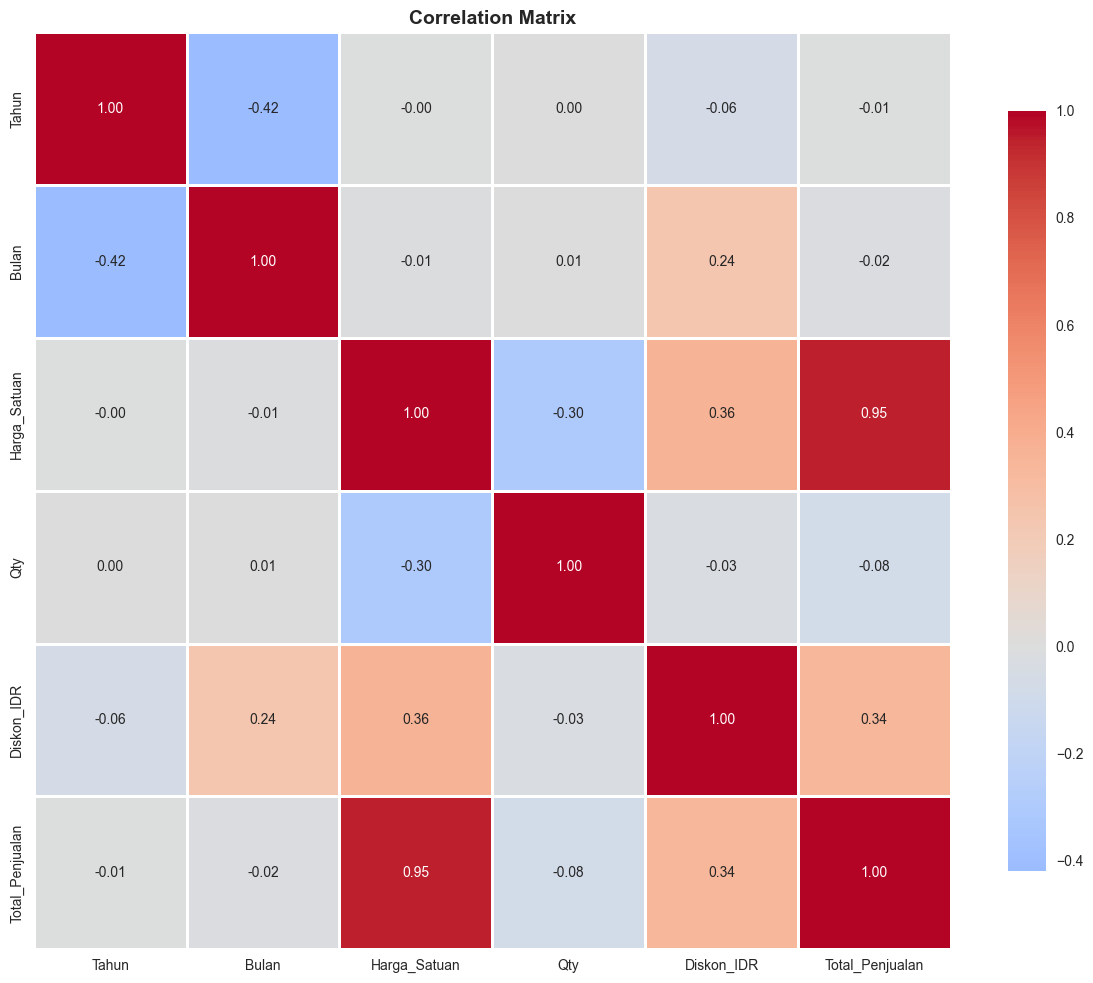

In [ ]:
# Basic dataset information
print(f'📐 Dataset shape: {data.shape}')
print(f'Number of features: {data.shape[1]}')
print(f'Number of records: {data.shape[0]}')

# Missing values
missing_values = data.isnull().sum()
missing_count = missing_values[missing_values > 0]
if len(missing_count) > 0:
    print('\n⚠️ Missing values:')
    print(missing_count)
else:
    print('\n✅ No missing values')

# Statistics for numeric features
print('\n📈 Statistics for numeric features:')
numeric_cols = data.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(data[numeric_cols].describe())

# Correlation matrix
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation = data[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 🧹 Data Preparation for Training

In this section, we will prepare data for model training: split into features and target variable, create regression and classification tasks.

In [ ]:
# Determine target variable for regression
# Look for suitable column for regression
target_candidates = ['total_revenue', 'revenue', 'price', 'quantity']
target_reg = None
for col in target_candidates:
    if col in data.columns:
        target_reg = col
        break

if target_reg is None:
    # Use first numeric column
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        target_reg = numeric_cols[0]
        print(f"⚠️ Using {target_reg} as target variable")

if target_reg and target_reg in data.columns:
    # Split into features and target variable
    X = data.drop(columns=[target_reg])
    y_regression = data[target_reg].values
    
    # Create binary classification task
    median_val = np.median(y_regression)
    y_classification = (y_regression > median_val).astype(int)
    
    # Normalize features for better convergence
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Split into training and test sets
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train_reg, y_test_reg = train_test_split(
        X, y_regression, test_size=0.2, random_state=42
    )
    _, _, y_train_class, y_test_class = train_test_split(
        X, y_classification, test_size=0.2, random_state=42
    )
    
    print(f"✅ Data prepared!")
    print(f"Target variable for regression: {target_reg}")
    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")
    print(f"Class distribution (training): {np.bincount(y_train_class)}")
    print(f"Class distribution (test): {np.bincount(y_test_class)}")
else:
    print("❌ Failed to determine target variable")

⚠️ Using Tahun as target variable
✅ Data prepared!
Target variable for regression: Tahun
Training set size: (9867, 1124)
Test set size: (2467, 1124)
Class distribution (training): [8499 1368]
Class distribution (test): [2148  319]


## 📈 1. Linear Regression (Implementation from Scratch)

In this section, we implement linear regression with gradient descent from scratch using NumPy.

### Gradient Formulas:
- **For coefficients:** dL/dw = (1/n) × X^T × (y_pred - y)
- **For intercept:** dL/db = (1/n) × Σ(y_pred - y)
- **Loss function (MSE):** L = (1/n) × Σ(y_pred - y)²

🔄 Training linear regression...


/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/Айжулдыз/instax-ml-project/src/linear_regression.py:130: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:132: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)



✅ Model trained!
Intercept: -507224025769912865980884573815937927459902808617334270450352895944089316832301662861379675263429012568773816488312497139837378656467874650490576705802971466041466869269243668254283996730414183439586463611937065132735291264598016.0000
Number of coefficients: 1124
Sample coefficients (first 5): [-1.53653711e+226  1.32612339e+227  5.34021818e+227  1.12597796e+227
  2.42560276e+227]


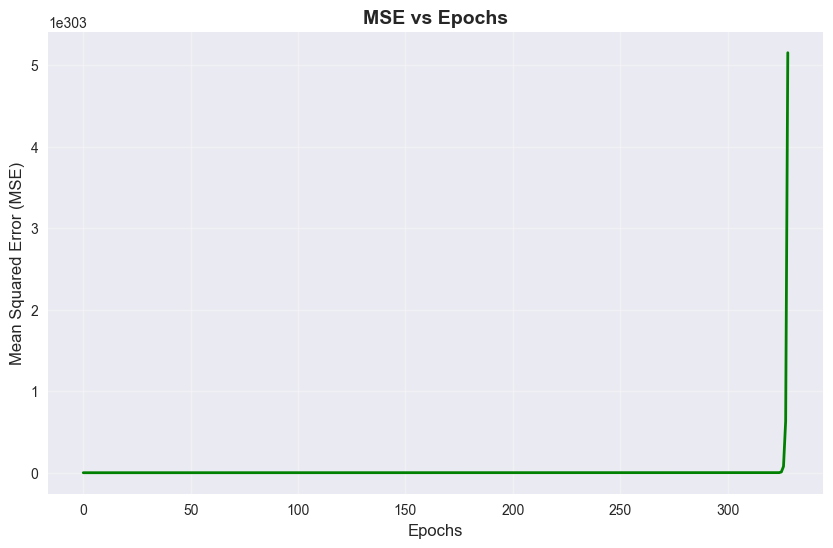


📊 MSE on test set: inf


/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:190: RuntimeWarning: overflow encountered in square
  x = um.square(x, out=x)


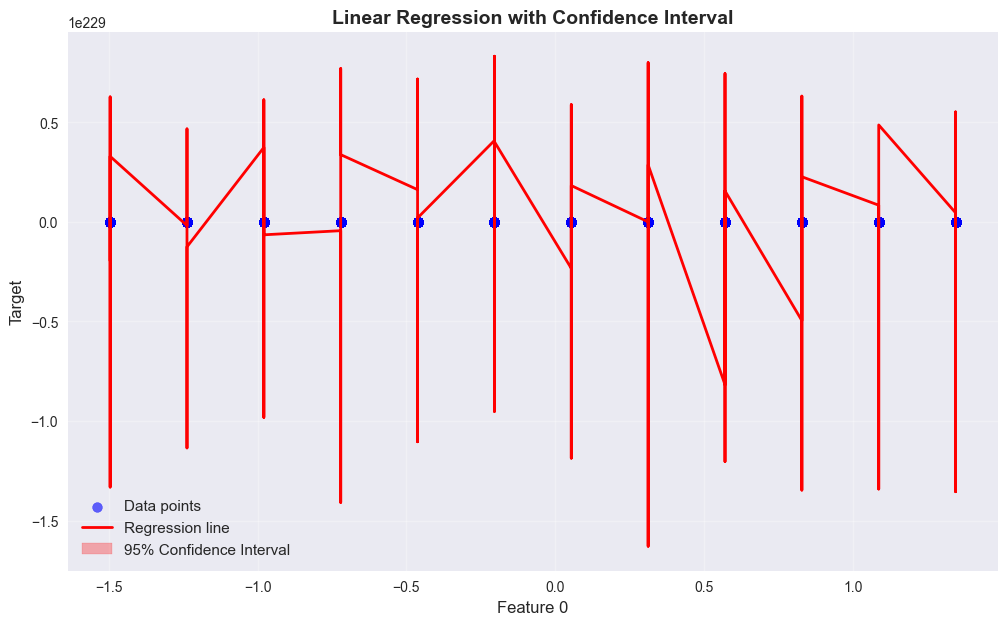

In [ ]:
# Train linear regression
print("🔄 Training linear regression...")
linear_model = LinearRegression(learning_rate=0.01, epochs=500, batch_size=32)
linear_model.fit(X_train.values, y_train_reg)

# Display coefficients and intercept
coeff, intercept = linear_model.get_coefficients()
print(f"\n✅ Model trained!")
print(f"Intercept: {intercept:.4f}")
print(f"Number of coefficients: {len(coeff)}")
print(f"Sample coefficients (first 5): {coeff[:5]}")

# Plot loss history
linear_model.plot_loss_history()

# Calculate MSE on test set
y_pred_reg = linear_model.predict(X_test.values)
mse_test = linear_model.mean_squared_error(y_test_reg, y_pred_reg)
print(f"\n📊 MSE on test set: {mse_test:.4f}")

# Visualize regression with confidence interval
# For multidimensional case, use first feature
if X_train.shape[1] > 0:
    linear_model.plot_regression_with_confidence(
        X_test.values, y_test_reg, 
        feature_idx=0, 
        confidence=0.95
    )

## 🔍 2. Logistic Regression (Implementation from Scratch)

In this section, we implement logistic regression with gradient descent from scratch.

### Formulas:
- **Sigmoid:** σ(z) = 1 / (1 + exp(-z))
- **Log-loss function:** L = -mean(y × log(σ(z)) + (1-y) × log(1-σ(z))) + (λ/2) × ||w||²
- **Gradients:**
  - dL/dw = (1/n) × X^T × (y_pred - y) + λ × w (L2 regularization)
  - dL/db = (1/n) × Σ(y_pred - y)

🔄 Training logistic regression...

✅ Model trained!
Intercept: -3.7320
Number of coefficients: 1124


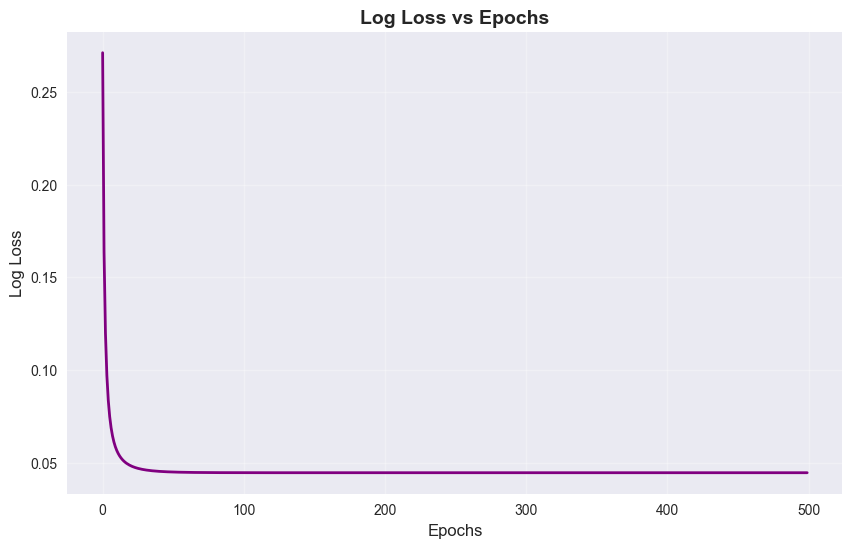


Metrics for Logistic Regression
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC AUC:   1.0000



In [ ]:
# Train logistic regression
print("🔄 Training logistic regression...")
logistic_model = LogisticRegression(
    learning_rate=0.01, 
    epochs=500, 
    batch_size=32,
    l2_reg=0.01  # L2 regularization
)
logistic_model.fit(X_train.values, y_train_class)

# Display coefficients
coeff, intercept = logistic_model.get_coefficients()
print(f"\n✅ Model trained!")
print(f"Intercept: {intercept:.4f}")
print(f"Number of coefficients: {len(coeff)}")

# Plot loss history
logistic_model.plot_loss_history()

# Predictions and metrics
y_pred_logistic = logistic_model.predict(X_test.values)
y_pred_proba_logistic = logistic_model.predict_proba(X_test.values)

# Calculate metrics
metrics_logistic = calculate_classification_metrics(
    y_test_class, y_pred_logistic, y_pred_proba_logistic
)
print_metrics_summary(metrics_logistic, "Logistic Regression")

## 🎯 3. Classification (Two Approaches)

In this section, we compare two classification approaches:
1. **Logistic Regression** (custom implementation) - required model
2. **Decision Tree / Random Forest** (sklearn) - additional model

### Classification Task
We use **binary classification**: split data into two classes based on the median value of the target variable.

MODEL 1: Logistic Regression (Custom Implementation)


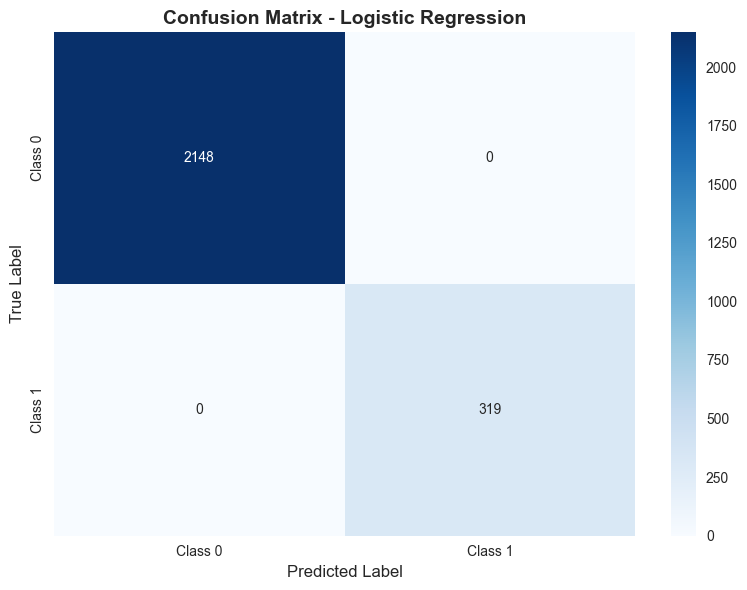

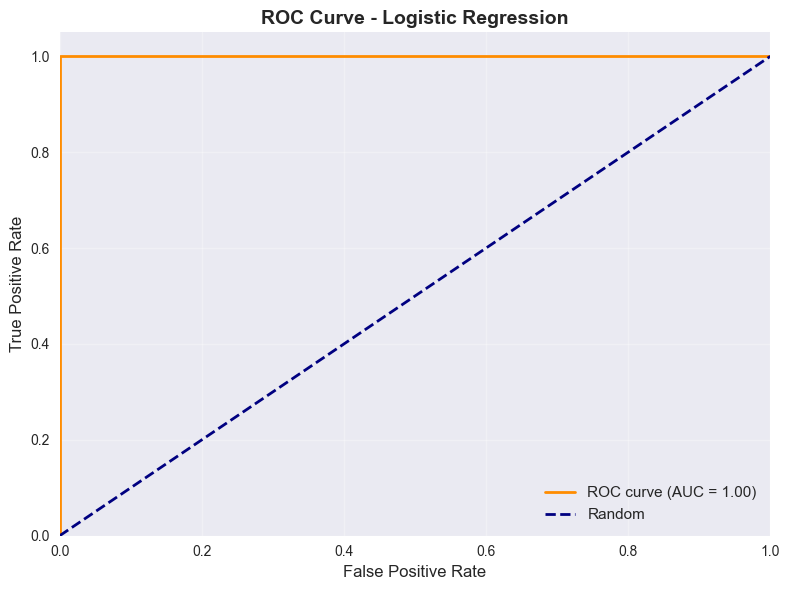


MODEL 2: Decision Tree (sklearn)

Metrics for Decision Tree
Accuracy:  0.8869
Precision: 0.8999
Recall:    0.8869
F1-Score:  0.8464
ROC AUC:   0.8945



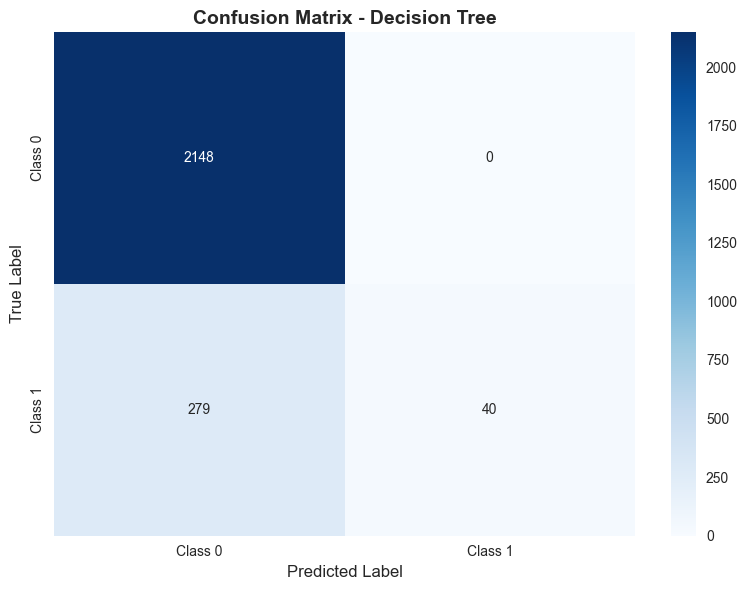

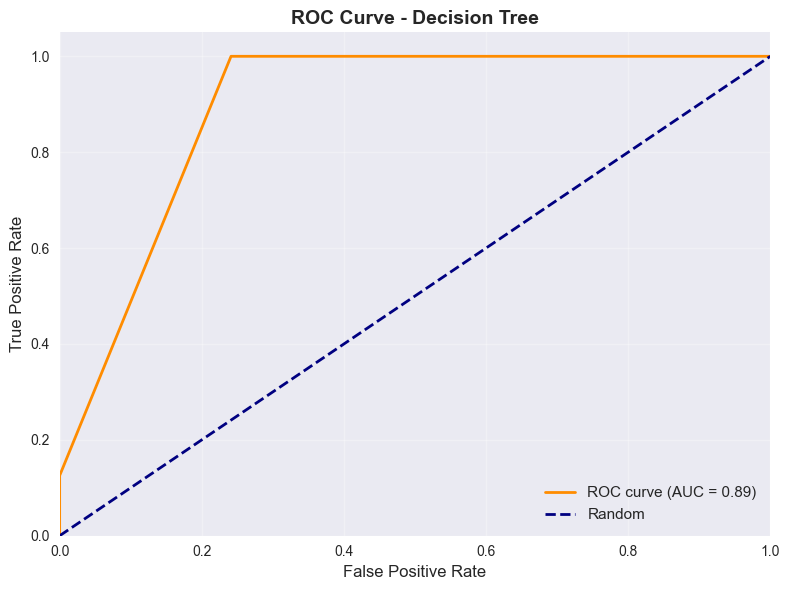


MODEL 3: Random Forest (sklearn)

Metrics for Random Forest
Accuracy:  0.8707
Precision: 0.7581
Recall:    0.8707
F1-Score:  0.8105
ROC AUC:   0.9889



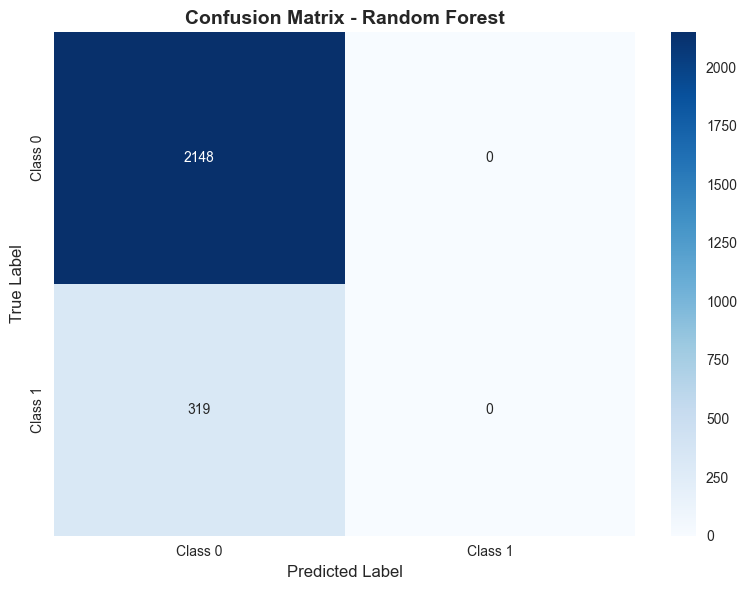

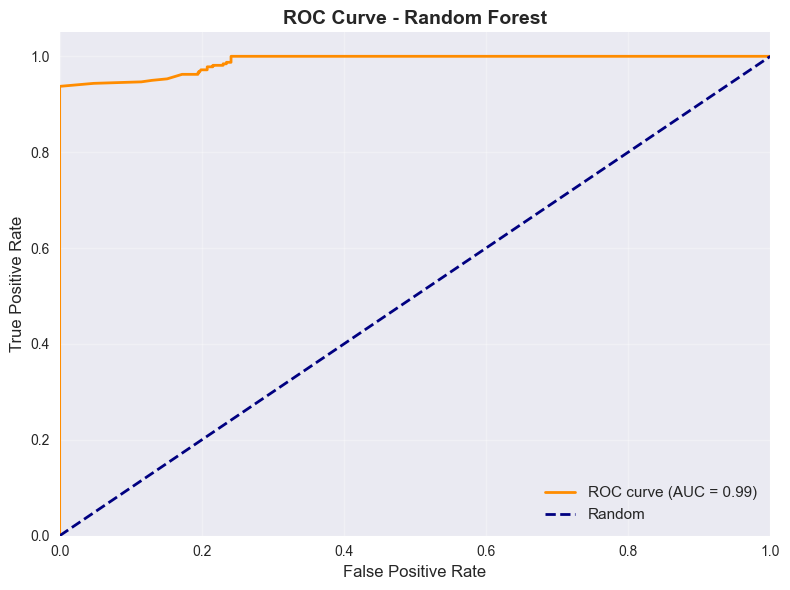

In [ ]:
# 3.1 Logistic Regression (already trained above)
print("="*60)
print("MODEL 1: Logistic Regression (Custom Implementation)")
print("="*60)

# Confusion matrix
plot_confusion_matrix(
    y_test_class, y_pred_logistic,
    class_names=['Class 0', 'Class 1'],
    title='Confusion Matrix - Logistic Regression'
)

# ROC curve
if len(np.unique(y_test_class)) == 2:
    plot_roc_curve(
        y_test_class, y_pred_proba_logistic,
        title='ROC Curve - Logistic Regression'
    )

# 3.2 Decision Tree (sklearn)
print("\n" + "="*60)
print("MODEL 2: Decision Tree (sklearn)")
print("="*60)

decision_tree = DecisionTreeModel(max_depth=10, random_state=42)
decision_tree.fit(X_train.values, y_train_class)

y_pred_dt = decision_tree.predict(X_test.values)
y_pred_proba_dt = decision_tree.predict_proba(X_test.values)

metrics_dt = calculate_classification_metrics(
    y_test_class, y_pred_dt, y_pred_proba_dt
)
print_metrics_summary(metrics_dt, "Decision Tree")

plot_confusion_matrix(
    y_test_class, y_pred_dt,
    class_names=['Class 0', 'Class 1'],
    title='Confusion Matrix - Decision Tree'
)

if len(np.unique(y_test_class)) == 2:
    plot_roc_curve(
        y_test_class, y_pred_proba_dt,
        title='ROC Curve - Decision Tree'
    )

# 3.3 Random Forest (sklearn) - additional model
print("\n" + "="*60)
print("MODEL 3: Random Forest (sklearn)")
print("="*60)

random_forest = RandomForestModel(n_estimators=100, max_depth=10, random_state=42)
random_forest.fit(X_train.values, y_train_class)

y_pred_rf = random_forest.predict(X_test.values)
y_pred_proba_rf = random_forest.predict_proba(X_test.values)

metrics_rf = calculate_classification_metrics(
    y_test_class, y_pred_rf, y_pred_proba_rf
)
print_metrics_summary(metrics_rf, "Random Forest")

plot_confusion_matrix(
    y_test_class, y_pred_rf,
    class_names=['Class 0', 'Class 1'],
    title='Confusion Matrix - Random Forest'
)

if len(np.unique(y_test_class)) == 2:
    plot_roc_curve(
        y_test_class, y_pred_proba_rf,
        title='ROC Curve - Random Forest'
    )

## 📊 4. Experiments and Metrics

In this section, we:
- Compare all models by metrics
- Conduct experiments with different training parameters
- Analyze the impact of learning rate, epochs, batch size on convergence

MODEL COMPARISON


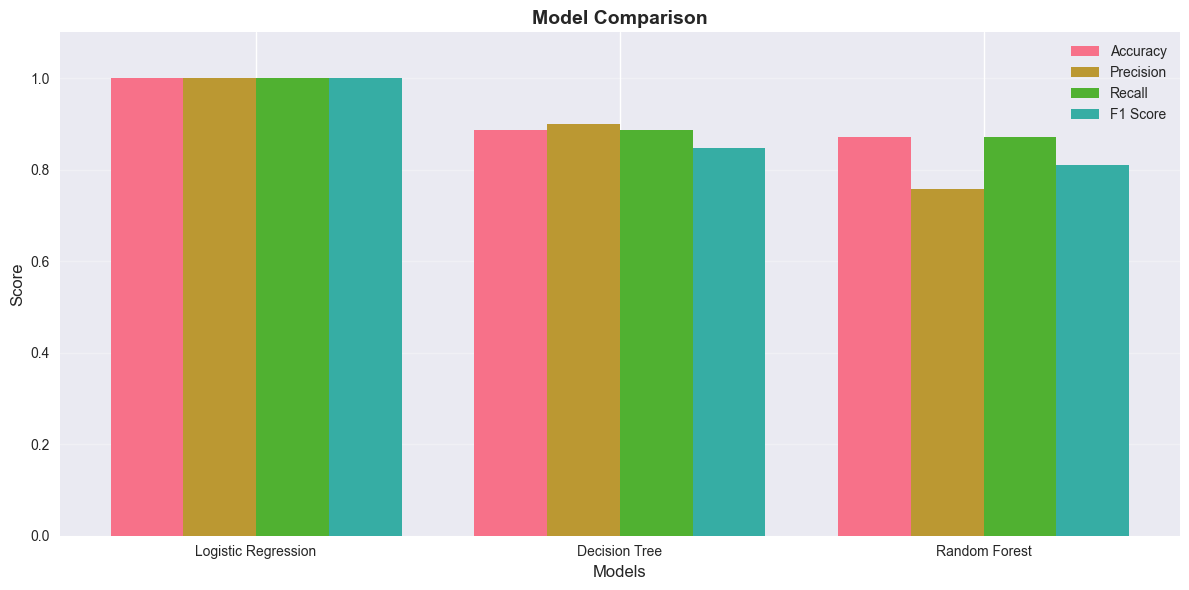


EXPERIMENT: Impact of Learning Rate on Convergence


/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/Айжулдыз/instax-ml-project/src/linear_regression.py:130: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:132: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/Айжулдыз/instax-ml-project/src/linear_regression.py:71: RuntimeWarning: invalid value encountered in subtract
  self.coefficients -= self.learning_rate * coeff_gradient
/Users/axmdl1/Documents/projects/Python/ml/Final_project_ML/.venv/lib/python3.13/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


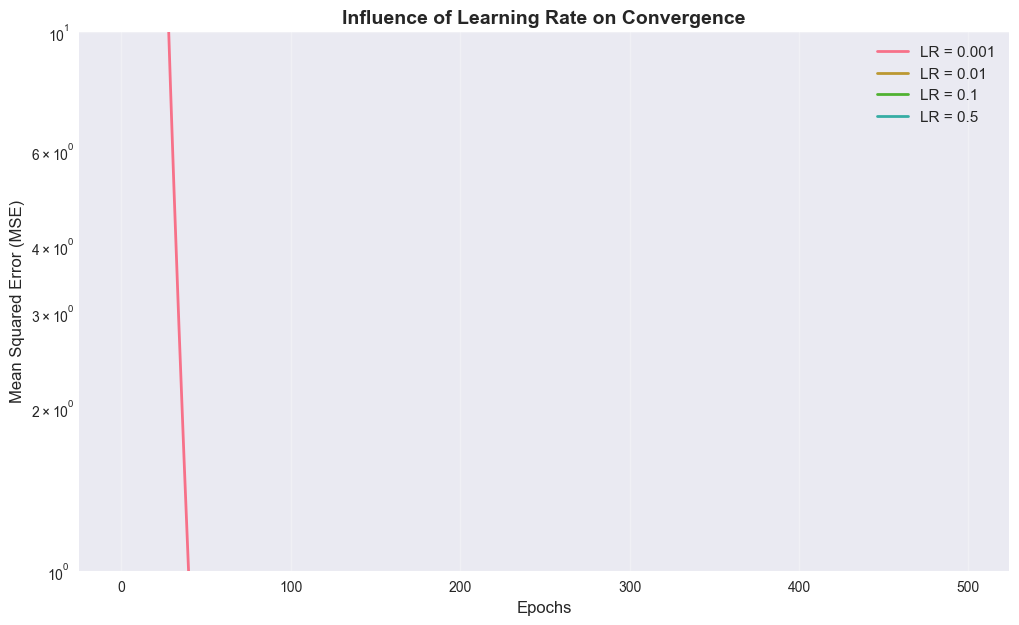


EXPERIMENT: Impact of Parameters on Logistic Regression

Top-5 parameter combinations by accuracy:
   learning_rate  epochs  batch_size  accuracy
0          0.001     100          16       1.0
1          0.001     100          32       1.0
2          0.001     100          64       1.0
3          0.001     500          16       1.0
4          0.001     500          32       1.0


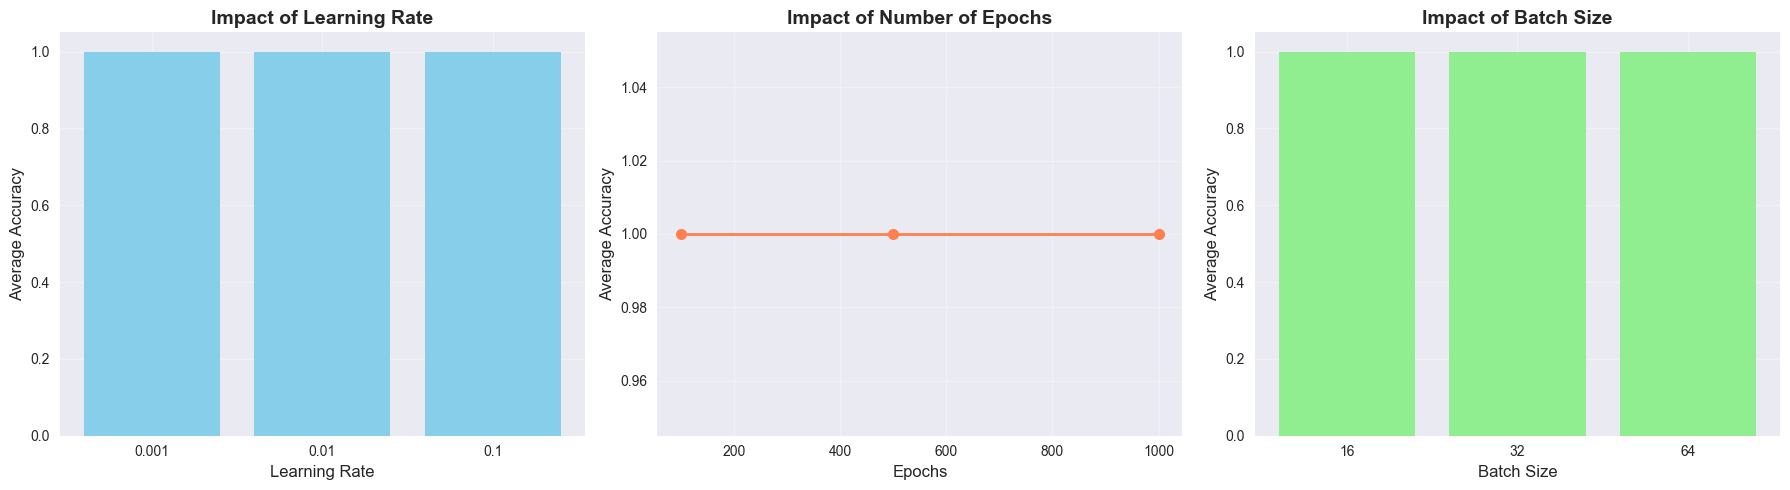


ANALYSIS OF DIFFERENCES BETWEEN MODELS

Explanation of differences:

1. Logistic Regression:
   - Linear model, assumes linear separability
   - Works well when features have linear relationship with target variable
   - Less prone to overfitting with proper regularization
   - Fast to train

2. Decision Tree:
   - Non-linear model, can capture complex dependencies
   - Easy to interpret and visualize
   - Can overfit with deep trees
   - Sensitive to noise in data

3. Random Forest:
   - Ensemble of trees, reduces overfitting
   - Usually shows better results due to averaging
   - Less interpretable than single tree
   - Requires more training time

Role of features:
- Important features affect quality of all models
- Decision Tree and Random Forest can show feature importance
- Logistic Regression shows influence through coefficients



In [ ]:
# 4.1 Compare all models
print("="*60)
print("MODEL COMPARISON")
print("="*60)

all_metrics = {
    'Logistic Regression': metrics_logistic,
    'Decision Tree': metrics_dt,
    'Random Forest': metrics_rf
}

compare_models(all_metrics)

# 4.2 Experiments with different learning rates
print("\n" + "="*60)
print("EXPERIMENT: Impact of Learning Rate on Convergence")
print("="*60)

linear_model.plot_learning_rate_comparison(
    X_train.values, y_train_reg,
    learning_rates=[0.001, 0.01, 0.1, 0.5]
)

# 4.3 Experiments with different parameters for logistic regression
print("\n" + "="*60)
print("EXPERIMENT: Impact of Parameters on Logistic Regression")
print("="*60)

learning_rates = [0.001, 0.01, 0.1]
epochs_list = [100, 500, 1000]
batch_sizes = [16, 32, 64]

results = []

for lr in learning_rates:
    for epochs in epochs_list:
        for batch_size in batch_sizes:
            if batch_size >= len(X_train):
                continue
                
            temp_model = LogisticRegression(
                learning_rate=lr,
                epochs=epochs,
                batch_size=batch_size
            )
            temp_model.fit(X_train.values, y_train_class)
            
            y_pred_temp = temp_model.predict(X_test.values)
            accuracy = np.mean(y_pred_temp == y_test_class)
            
            results.append({
                'learning_rate': lr,
                'epochs': epochs,
                'batch_size': batch_size,
                'accuracy': accuracy,
                'final_loss': temp_model.losses[-1] if temp_model.losses else None
            })

results_df = pd.DataFrame(results)
print("\nTop-5 parameter combinations by accuracy:")
print(results_df.nlargest(5, 'accuracy')[['learning_rate', 'epochs', 'batch_size', 'accuracy']])

# Visualize parameter impact
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Impact of learning rate
lr_avg = results_df.groupby('learning_rate')['accuracy'].mean()
axes[0].bar(range(len(lr_avg)), lr_avg.values, color='skyblue')
axes[0].set_xticks(range(len(lr_avg)))
axes[0].set_xticklabels(lr_avg.index)
axes[0].set_xlabel('Learning Rate', fontsize=12)
axes[0].set_ylabel('Average Accuracy', fontsize=12)
axes[0].set_title('Impact of Learning Rate', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Impact of epochs
epochs_avg = results_df.groupby('epochs')['accuracy'].mean()
axes[1].plot(epochs_avg.index, epochs_avg.values, marker='o', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Average Accuracy', fontsize=12)
axes[1].set_title('Impact of Number of Epochs', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Impact of batch size
batch_avg = results_df.groupby('batch_size')['accuracy'].mean()
axes[2].bar(range(len(batch_avg)), batch_avg.values, color='lightgreen')
axes[2].set_xticks(range(len(batch_avg)))
axes[2].set_xticklabels(batch_avg.index)
axes[2].set_xlabel('Batch Size', fontsize=12)
axes[2].set_ylabel('Average Accuracy', fontsize=12)
axes[2].set_title('Impact of Batch Size', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.4 Analysis of differences between models
print("\n" + "="*60)
print("ANALYSIS OF DIFFERENCES BETWEEN MODELS")
print("="*60)
print("""
Explanation of differences:

1. Logistic Regression:
   - Linear model, assumes linear separability
   - Works well when features have linear relationship with target variable
   - Less prone to overfitting with proper regularization
   - Fast to train

2. Decision Tree:
   - Non-linear model, can capture complex dependencies
   - Easy to interpret and visualize
   - Can overfit with deep trees
   - Sensitive to noise in data

3. Random Forest:
   - Ensemble of trees, reduces overfitting
   - Usually shows better results due to averaging
   - Less interpretable than single tree
   - Requires more training time

Role of features:
- Important features affect quality of all models
- Decision Tree and Random Forest can show feature importance
- Logistic Regression shows influence through coefficients
""")

## 🎮 5. Interactive Interface

This section presents an interactive interface with widgets for:
- Data loading
- Model selection
- Gradient descent parameter configuration (learning rate, epochs, batch size)
- Display of loss plots, metrics and results

In [ ]:
# Create interactive interface
# Note: If widgets don't display, you may need to enable Jupyter extensions:
# Run in terminal: jupyter nbextension enable --py widgetsnbextension
# Or use: jupyter labextension install @jupyter-widgets/jupyterlab-manager

try:
    trainer = create_interactive_interface()
    if trainer is None:
        print("\n" + "="*60)
        print("Widgets are not available, but you can still use models programmatically.")
        print("="*60)
        print("\nExample usage:")
        print("  from src.logistic_regression import LogisticRegression")
        print("  model = LogisticRegression(learning_rate=0.01, epochs=500)")
        print("  model.fit(X_train.values, y_train_class)")
        print("  y_pred = model.predict(X_test.values)")
except Exception as e:
    print(f"Error creating interface: {e}")
    print("\nYou can still use the models directly in code.")
    print("All models are already trained above and ready to use!")


## 📝 Conclusion

In this notebook, we:

✅ **Implemented linear regression from scratch:**
   - Gradient descent (batch/mini-batch)
   - Loss visualization by epochs
   - Learning rate impact analysis
   - Confidence intervals

✅ **Implemented logistic regression from scratch:**
   - Sigmoid and log-loss function
   - Gradient descent with L2 regularization
   - Mini-batch training

✅ **Compared classification models:**
   - Logistic Regression (custom implementation)
   - Decision Tree (sklearn)
   - Random Forest (sklearn)

✅ **Conducted experiments:**
   - Calculated all metrics (accuracy, precision, recall, F1-score, ROC AUC)
   - Compared models
   - Investigated impact of training parameters

✅ **Created interactive interface:**
   - Widgets for data loading
   - Parameter configuration
   - Results visualization

**Data Source:** instax_sales_transaction_data.csv

**Technical Details:**
- All gradient descent algorithms implemented manually using NumPy
- Gradient formulas presented in code comments
- Support for batch and mini-batch gradient descent
- L2 regularization for logistic regression
